<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/ESAA_YB_WEEK5_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[ 개념정리 ]**

##### **01 분류(Classification)의 개요**

---

지도학습
- 레이블(label), 즉 명시적인 정답이 있는 데이터로 학습을 진행하는 머신러닝 방법

분류(Classification)
- 지도학습의 대표적인 유형

##### **02 결정 트리**

---

앙상블의 기본 알고리즘이자 가장 직관적으로 이해가 쉬운 알고리즘

데이터에 존재하는 규칙을 학습을 통해 자동으로 찾아 트리(Tree) 기반의 분류 규칙을 만듦

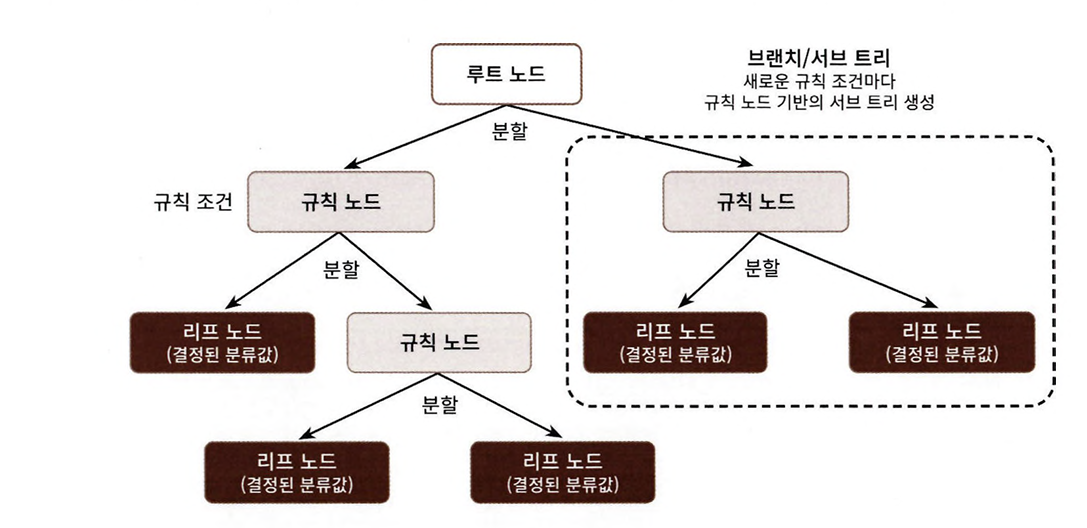

- 규칙 노드/결정 노드(Decision Node) : 규칙 조건이 되는 것
  - 정보 균일도가 높은 데이터 세트를 먼저 선택하도록 규칙 조건 생성
- 리프 노드(Leaf Node) : 결정된 클래스 값

새로운 규칙 조건마다 서브 트리(Sub Tree) 생성

*트리의 깊이가 깊어질 수록 결정 트리의 예측 성능이 저하될 수 있음(Overfitting)

**트리를 어떻게 분할(Split)할 것인가가 가장 중요!**

-> **최대한 균일한 데이터 세트를 구성해야함**

- 정보 이득(Information gain)
  - 엔트로피(Entropy) : 데이터 집합의 혼잡도
    
    -> 혼잡도가 높으면 엔트로피가 높음
    -> 같은 값이 많이 있을 수록 엔트로피가 낮음

  - **정보 이득 = 1 - 엔트로피**
  - **정보 이득이 높을 수록, 엔트로피가 작을 수록 good**

- 지니 계수
  - 불평등 지수를 나타냄
  - 0이 가장 평등하고, 1로 갈수록 불평등
  - **지니 계수가 낮을 수록 good**

DecisionTreeClassifier
- 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할 후, 데이터가 모두 특정 분류에 속하면 분할을 멈추고 분류 결정

**결정 트리 모델의 결정**
- '균일도'를 기반
- 트리 크기를 제한하는 튜닝 필요
  - 과적합(Overfitting) 때문

**결정 트리 파라미터**
- DecisionTreeClassifier: 분류 클래스
- DecisionTreeRegressor: 회귀 클래스

min_samples_split
- 노드를 분할하기 위한 최소 sample data의 수
- 과적합 제어
- default=2, 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가

min_samples_leaf
- 분할이 될 경우 가지 노드(branch node)에서 가져야 하는 최소 sample data 수
- 과적합 제어

max_features
- 최적의 분할을 위해 고려할 최대 feature 수
- default=None (전체 feature 선정)

max_depth
- 트리의 최대 깊이 규정
- default=None
  - 완벽하게 클래스 결정 값이 될 때까지 깊이를 키우며 분할
  - 노드가 가지는 데이터 수가 min_samples_split보다 작아질 때까지 깊이 증가

max_leaf_nodes
- 리프 노드의 최대 개수

**결정 트리 모델의 시각화**

Graphviz 패키지
- 그래프 기반의 dot 파일로 기술된 다양한 이미지로 쉽게 시각화하는 패키지

```
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file="file",class_names='', feature_names='', impurity=True, filled=True)

import graphviz
with open("file") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)
```
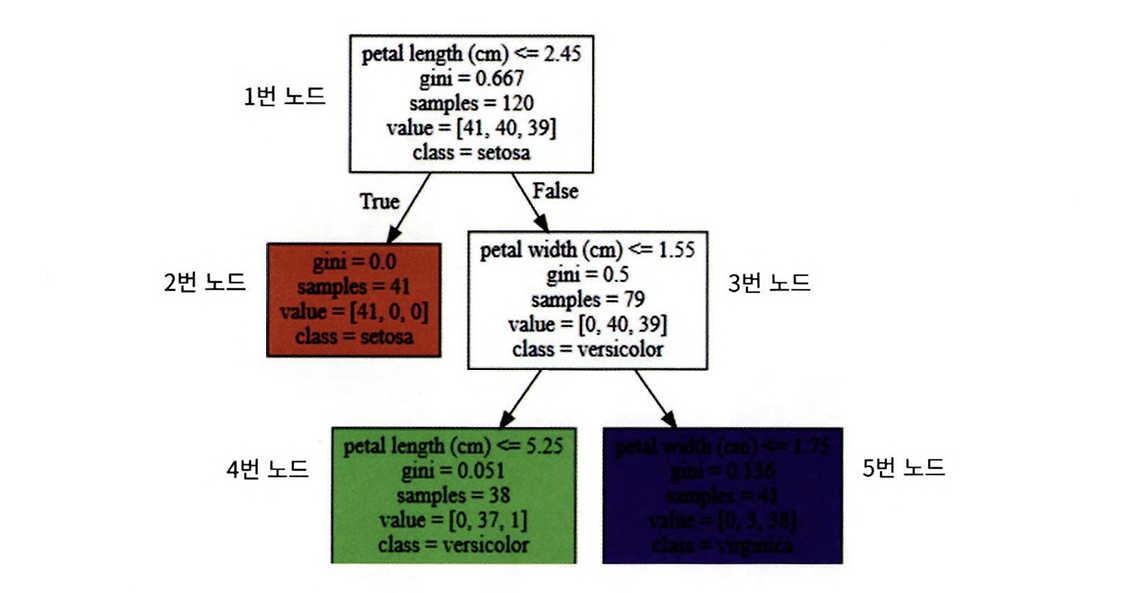


- samples : 전체 데이터의 개수
- value : 각각의 class 데이터의 개수
- class=setosa : 하위 노드를 가질 경우, setosa의 개수가 가장 많다는 의미

feature_importances_
- ndarray 값 반환
- feature가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는 지를 정규화 값으로 표현
- 높을 수록 해당 feature의 중요도가 높음

```
dt_clf.feature_importances_
```

**결정 트리 과적합(Overfitting)**

make_classification()
- 분류를 위한 테스트용 데이터를 쉽게 만들 수 있음
- 반환 객체 -> feature 데이터셋, 클래스 레이블 데이터셋

**결정 트리 실습 - 사용자 행동 인식 데이터 세트**

cv_results_
- GridSearchCV 객체에서 CV세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능 수치를 지님


### **[ 필사 ]**

##### **01 분류(Classification)의 개요**

##### **02 결정 트리**

결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Decision Tree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 데스트 데이터 세트로 분리
iris_data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,
                                               test_size=0.2,random_state=11)

# DecisionTreeClassifer 학습.
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [5]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,impurity=True,filled=True)

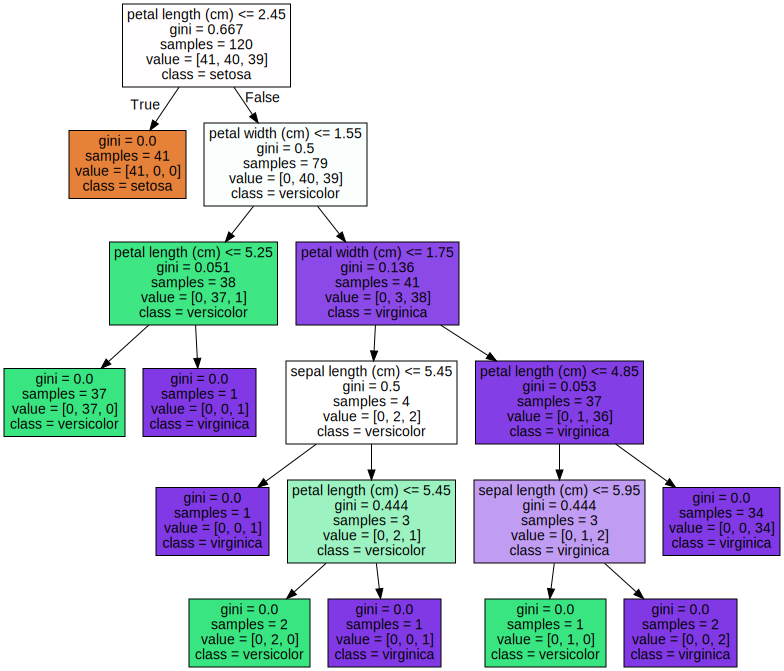

In [6]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphvize가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

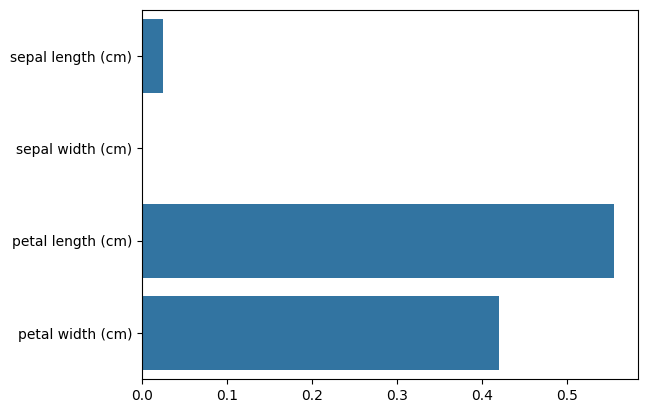

In [9]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names,dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name,value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

결정 트리 과적합(Overfitting)

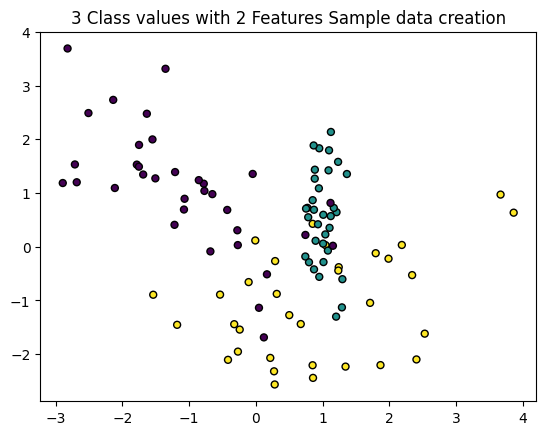

In [11]:
from ast import increment_lineno
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features,y_labels=make_classification(n_features=2,n_redundant=0,n_informative=2,
                                        n_classes=3,n_clusters_per_class=1,random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,edgecolor='k')

visualize_boundary() 함수

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

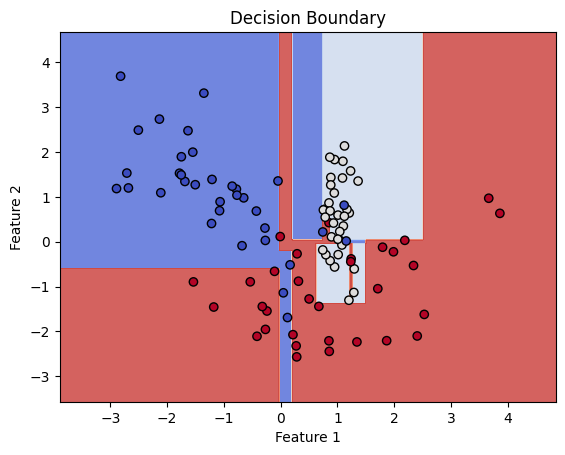

In [16]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf=DecisionTreeClassifier(random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

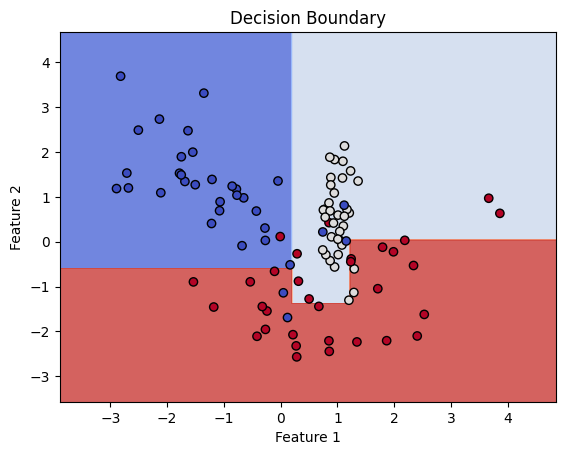

In [17]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6,random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백을 분리되어 있음. 이를 DataFrame으로 롣.
feature_name_df=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/UCI HAR Dataset/features.txt',sep='\s+',
                            header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [19]:
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [20]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                              columns=['dup_cnt'])
  feature_dup_df=feature_dup_df.reset_index()
  new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name',
                                                          'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                            if x[1] > 0 else x[0], axis=1)
  new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

In [21]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/UCI HAR Dataset/features.txt',sep='\s+',
                              header=None,names=['column_index','column_name'])
  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df=get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 반환
  feature_name=new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/UCI HAR Dataset/train/X_train.txt',sep='\s+',
                      names=feature_name)
  X_test=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/UCI HAR Dataset/test/X_test.txt',sep='\s+',
                     names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/UCI HAR Dataset/train/y_train.txt',sep='\s+',
                      header=None,names=['action'])
  y_test=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/UCI HAR Dataset/test/y_test.txt',sep='\s+',
                     header=None,names=['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test=get_human_dataset()

In [22]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [23]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [25]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split':[16]
}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [26]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df=pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [27]:
max_depths=[6,8,10,12,16,20,24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf=DecisionTreeClassifier(max_depth=depth,min_samples_split=16,random_state=156)
  dt_clf.fit(X_train,y_train)
  pred=dt_clf.predict(X_test)
  accuracy=accuracy_score(y_test,pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth,accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [30]:
params={
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [32]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


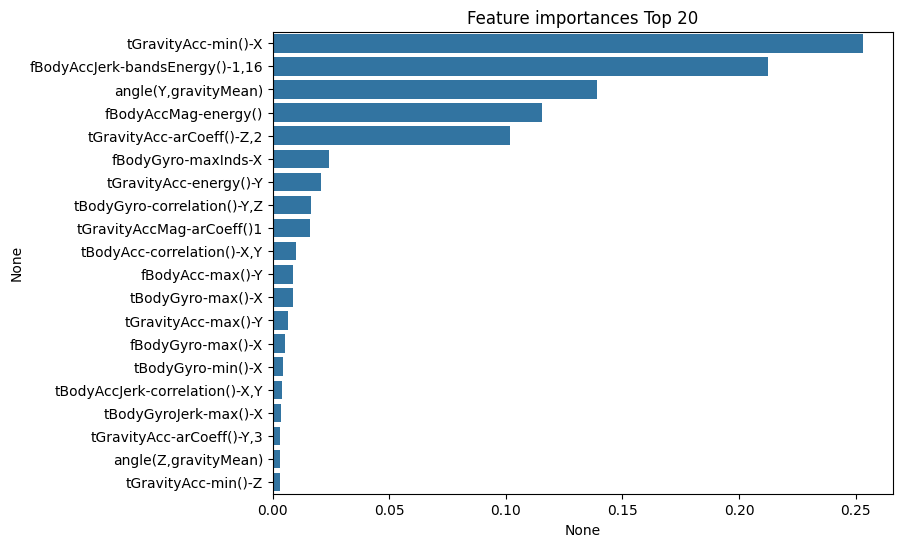

In [34]:
import seaborn as sns

ftr_importance_values=best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대 그래프로 쉽게 표현하기 위헤 Series 변환
ftr_importances=pd.Series(ftr_importance_values,index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()